# Курс 1

## Глава 1: Введение

In [294]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import itertools


plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 25,
        'axes.labelsize': 25,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'font.size': 20,
        'figure.figsize': (8, 5),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

In [ ]:
def mean_value(string):
    lst = list(map(float, string.split()))
    mean = sum(lst) / len(lst)
    print(f'mean = {mean}')
    
def std_value(string):
    lst = list(map(float, string.split()))
    mean = sum(lst) / float(len(lst))
    print(f'mean      = {mean}')
    dev_sqr_values = [(i - mean)**2 for i in lst]
    std2 = math.sqrt(sum(dev_sqr_values) / (len(dev_sqr_values)-1))
    print(f'numpy std = {np.std(np.array(lst))}')
    print(f'std       = {std2}')
    
std_value(input())

In [2]:
import math

def ErfSigma(x, sigma):
    return math.erf(x/(math.sqrt(2)*sigma))

def ErfSigmaDiff(mean, x1, x2):
    def ErfSigmaValue(sigma):
        return 0.5 * (math.erf((x2 - mean)/(math.sqrt(2)*sigma)) - math.erf((x1 - mean)/(math.sqrt(2)*sigma)))
    return ErfSigmaValue

mean = 25
x1 = 10
x2 = 15
ErfInterval = ErfSigmaDiff(mean, x1, x2)

for sigma_i in range(1,20):
    print('P(10, 15) =', round(ErfInterval(sigma_i), 5), f'(sigma = {sigma_i})' )

P(10, 15) = 0.0 (sigma = 1)
P(10, 15) = 0.0 (sigma = 2)
P(10, 15) = 0.00043 (sigma = 3)
P(10, 15) = 0.00612 (sigma = 4)
P(10, 15) = 0.0214 (sigma = 5)
P(10, 15) = 0.04158 (sigma = 6)
P(10, 15) = 0.0605 (sigma = 7)
P(10, 15) = 0.07525 (sigma = 8)
P(10, 15) = 0.08547 (sigma = 9)
P(10, 15) = 0.09185 (sigma = 10)
P(10, 15) = 0.09531 (sigma = 11)
P(10, 15) = 0.09668 (sigma = 12)
P(10, 15) = 0.0966 (sigma = 13)
P(10, 15) = 0.09554 (sigma = 14)
P(10, 15) = 0.09384 (sigma = 15)
P(10, 15) = 0.09173 (sigma = 16)
P(10, 15) = 0.08939 (sigma = 17)
P(10, 15) = 0.08693 (sigma = 18)
P(10, 15) = 0.08442 (sigma = 19)


In [3]:
# Probability of value to lay between x1 and x2 for Gaussian distribution with sigma and mean
def prob_gauss(mean, sigma, x1, x2):
    return 0.5 * (math.erf((x2 - mean)/(math.sqrt(2)*sigma)) - math.erf((x1 - mean)/(math.sqrt(2)*sigma)))

prob = prob_gauss(150, 8, 154, 1000) # x2 is simply infinity
print(f'P (x > 154) = {prob}')

P (x > 154) = 0.3085375387259869


In [4]:
def IntervalGauss(mean, sigma):
    def prob_gauss(x1, x2):
        return 0.5 * (math.erf((x2 - mean)/(math.sqrt(2)*sigma)) - math.erf((x1 - mean)/(math.sqrt(2)*sigma)))
    return prob_gauss

# Exercises 1.7
func_interval = IntervalGauss(100, 5)
for x1, x2 in zip([50, 90, 50], [150, 110, 100]):
    print(f'P({x1}, {x2}) = {func_interval(x1, x2)}')
    
# IQ
func_interval = IntervalGauss(100, 15)
print(f'P(IQ > 125) = {func_interval(125, 200)}')
print(f'P(70 > IQ > 112) = {func_interval(70, 112)}')

P(50, 150) = 1.0
P(90, 110) = 0.9544997361036416
P(50, 100) = 0.5
P(IQ > 125) = 0.04779035225973077
P(70 > IQ > 112) = 0.765394469468424


In [5]:
# calculate confidence level for Gauss with mean = 0 and sigma = 1
mean = 0
sigma = 1
n_sigma = 2
conf_interval_left = mean - n_sigma * sigma
conf_interval_right = mean + n_sigma * sigma
print(f'conf level ({n_sigma} sigmas) = {prob_gauss(mean, sigma, conf_interval_left, conf_interval_right)}')

conf level (2 sigmas) = 0.9544997361036416


In [6]:
# Now we do n_sigma scan for our distribution to find interval for 99% CL
mean = 10
sigma = 0.5
sigma_step = 0.001
sigma_start = 2.5
conf_level = 0
count = 0
conf_interval_left = -1
conf_interval_right = -1
while conf_level < 0.99:
    conf_interval_left = mean - (sigma_start + count * sigma_step) * sigma
    conf_interval_right = mean + (sigma_start + count * sigma_step) * sigma
    conf_level = prob_gauss(mean, sigma, conf_interval_left, conf_interval_right)
    count += 1
    #print(f'conf level [{conf_interval_left}, {conf_interval_right}] = {prob_gauss(mean, sigma, conf_interval_left, conf_interval_right)}')
print(f'conf level [{conf_interval_left}, {conf_interval_right}] = {prob_gauss(mean, sigma, conf_interval_left, conf_interval_right)}')

conf level [8.712, 11.288] = 0.99000493536853


In [7]:
# p-value и проверка гипотез
# Известно, что выздоровление пациентов длится 20 дней без препарата.
# Мы тестируем препарат на выборке из 64 пациентов и получаем для этой выборки mean = 18.5, sigma = 4
# Нужно определить, реально ли препарат ускоряет выздоровление (M != 20, гипотеза H1)
# или никак на него не влияет (M = 20, гипотеза H0, нулевая)

mean_general_0 = 20
mean_selective = 18.5
sigma_selective = 4
n_selective = 64

# Вероятность данного отклонения выборочной средней от генеральной средней
# В качестве sigma разброса средних для выборочных средних мы берём
sigma_mean = sigma_selective / math.sqrt(n_selective)

# И получаем параметры распеределения (нормального) выборочных средних для H0:
# mu = mean_general_0, sigma = sigma_mean
# Зная параметры этого распределения, мы можем найти вероятность получения выборочного среднего занчения
# mean_selective = 18.5, рассчитав отклонение его от mean_general_0

# Вероятность обнаружить значение, лежащее за пределами интервала x1, x2 (слева или справа)
def prob_gauss_deviation(mean, sigma, x1, x2):
    p_interval = 0.5 * (math.erf((x2 - mean)/(math.sqrt(2)*sigma)) - math.erf((x1 - mean)/(math.sqrt(2)*sigma)))
    p_deviation = 1 - p_interval
    print(f'deviation: +{(x2 - mean) / sigma}/{(x1 - mean) / sigma} in sigmas')
    return p_deviation
    
deviation = mean_general_0 - mean_selective
x1 = mean_general_0 - deviation
x2 = mean_general_0 + deviation
p_value = prob_gauss_deviation(mean_general_0, sigma_mean, x1, x2)
print(p_value)

# Рассчитаем доверительный интервал 95% для для среднего значения из данной задачи
def conf_interval(mean, sigma, conf_level):
    sigma_start = 1
    current_conf_level = 0
    sigma_step = 0.001
    count = 0
    while current_conf_level < conf_level:
        conf_interval_left = mean - (sigma_start + count * sigma_step) * sigma
        conf_interval_right = mean + (sigma_start + count * sigma_step) * sigma
        current_conf_level = prob_gauss(mean, sigma, conf_interval_left, conf_interval_right)
        count += 1
    return conf_interval_left, conf_interval_right

print(f'95% confidence interval = {conf_interval(mean_selective, sigma_mean, 0.95)}')

deviation: +3.0/-3.0 in sigmas
0.002699796063260207
95% confidence interval = (17.52, 19.48)


In [11]:
# Задачка про баллы по курсу
mean0 = 115
mean_selective = 118
n_selective = 144
sigma_selective = 9

def conf_level_calculation(mean0, mean1, sigma1, n):
    deviation = abs(mean1 - mean0)
    x1 = mean1 - deviation
    x2 = mean1 + deviation
    sigma_general = sigma1 / math.sqrt(n)
    p_value = 1 - prob_gauss(mean1, sigma_general, x1, x2)
    return p_value
    
print(conf_level_calculation(mean0, mean_selective, sigma_selective, n_selective))

6.334248366623996e-05


# Глава 2: сравнение средних

## t-распределение Стьюдента

In [14]:
# Мы будем использовать t-распределение Стьюдента в тех случаях, когда стандартное отклонение генеральной совокупности
# (то есть sigma) неизвестно и мы используем sigma частичной выборки, делённое на корень из числа измерений
# se = sd / sqrt(n)

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Задачка для практики t-распределения (см. на видео 2.1 в курсе)
mean0 = 10    # среднее генеральной совокупности
mean1 = 10.8  # среднее выборки
sigma1 = 2    # sigma выборки
n = 25        # число наблюдений в выбоке
se = sigma1 / math.sqrt(n) # это мы возьмём вместо sigma генеральной совокупности

def t_criterion(mean_general, mean_selective, sigma_selective, n):
    t = (mean_general - mean_selective) / (sigma_selective / math.sqrt(n))
    # можно обоими способами df = 1 - cdf
    # умножаем на 2, так как считаем с обоих концов
    p = 2* stats.t.sf(abs(t), df=(n-1))
    p = 2 * (1 - stats.t.cdf(abs(t), df=n-1))
    return p

print(f'p = {t_criterion(mean0, mean1, sigma1, n)}')

p = 0.0569398499365914


In [23]:
# Следующая задача
# Если на выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: μ=10  
# и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости  (двусторонний) равен:
t = -2
n = 15
p_value = 2 * (1 - stats.t.cdf(abs(t), df=n-1))
print('p-value =', p_value)

p-value = 0.06528795288911193


## Сравнение двух средних, t-критерий Стьюдента

In [60]:
# DNA and two distributions t-criterion test
first = '84,7   105,0   98,9   97,9   108,7   81,3   99,4   89,4   93,0   119,3   99,2   99,4   97,1   112,4   99,8   94,7   114,0   95,1   115,5   111,5'
second = '57,2   68,6   104,4   95,1   89,9   70,8   83,5   60,1   75,7   102,0   69,0   79,6   68,9   98,6   76,0   74,8   56,0   55,6   69,4   59,5'
set1 = np.array(list(map(float, first.replace(',', '.').split())))
set2 = np.array(list(map(float, second.replace(',', '.').split())))
print(set1, set2, sep='\n')
print()
print(f'set 1: mean = {round(set1.mean(), 3)}, std = {round(set1.std(), 3)}, N = {set1.shape[0]}')
print(f'set 2: mean = {round(set2.mean(), 3)}, std = {round(set2.std(), 3)}, N = {set2.shape[0]}')

# Есть две гипотезы для генеральных совокупностей
# H0: средние значения генеральных совокупностей равны (M1 = M2) M1 - M2 = 0, то есть их разность
# распределена (нормально) со средним в нуле
# H1: средние значения генеральных совокупностей НЕ равны (M1 != M2)

# Рассчитываем t-критерий для гипотезы H0. Мы проверяем, какова вероятность того, что разность между
# средними генеральных совокупностей, на самом деле 0, но мы получали выюорки с разностью отличной от нуля,
# то есть mean1 - mean2 (см. выше)

# t = (M0 - M1) / se = (M0 - M1) / sqrt(sd1^2/n1 + sd2^2/n2)

mean1 = set1.mean()
mean2 = set2.mean()
sd1 = set1.std()
sd2 = set2.std()
n1 = set1.shape[0]
n2 = set2.shape[0]
se = np.sqrt(sd1**2 / n1 + sd2**2 / n2)

# Важно понимать, что в нашем случае для гипотезы H0 среднее - это 0, 
# а значение mean1 - mean2 это выборочное среднее, которое отклоняется от преполагаемого в гипотезе H0
# M0 - M1 = 0 - (mean1 - mean2)

t = (mean1 - mean2) / se
print(f't = {t}')

# Число степеней свободы
ndf = n1 + n2 - 2

# print(stats.t.cdf.__doc__)
# Вероятность отклонения
p_value = 2 * (1 - stats.t.cdf(t, df=ndf))
print(f'p-value = {p_value}')
if p_value > 0.05:
    print("H0 can't be rejected, means are statistically equal, no factor impact")
else:
    print("H0 can be rejected, means aren't statistically equal, factor impacts")

[ 84.7 105.   98.9  97.9 108.7  81.3  99.4  89.4  93.  119.3  99.2  99.4
  97.1 112.4  99.8  94.7 114.   95.1 115.5 111.5]
[ 57.2  68.6 104.4  95.1  89.9  70.8  83.5  60.1  75.7 102.   69.   79.6
  68.9  98.6  76.   74.8  56.   55.6  69.4  59.5]

set 1: mean = 100.815, std = 9.987, N = 20
set 2: mean = 75.735, std = 15.067, N = 20
t = 6.204931974500849
p-value = 2.980779745254125e-07
H0 can be rejected, means aren't statistically equal, factor impacts


CDF
1 sigma left and right for norm = 0.6826894921370859
2 sigma left and right for norm = 0.9544997361036416
PPF
CDF 1-sided 1 sigma = 0.8413447460685429
PPF corresponding to 0.84 = 0.994457883209753
Or directly: PPF[CDF(1 sigma)] =  1.0
PPF corresponding to two-sided 0.95 CI = 1.959963984540054

               Mx         SD     N        SE
Выборка1  100.815  10.246503  20.0  2.291188
Выборка2   75.735  15.458102  20.0  3.456537


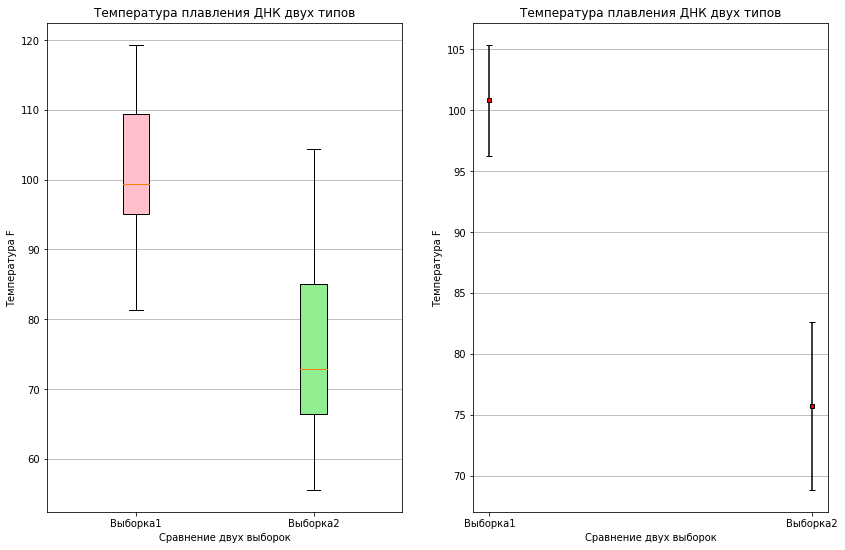

In [121]:
# CDF - cumulative distribution funcion
# CDF(x) = P(X <= x)
print('CDF')
print('1 sigma left and right for norm =', stats.norm.cdf(1) - stats.norm.cdf(-1))
print('2 sigma left and right for norm =', stats.norm.cdf(2) - stats.norm.cdf(-2))
# PPF - percent point function or quantile function (or invercive CDF)
# То есть, если CDF производит преобразование F(x): R -> [0, 1] из аргумента в вероятность
# то PPF делает обратное преобразование Q: [0, 1] -> R
print('PPF')
print('CDF 1-sided 1 sigma =', stats.norm.cdf(1)) # ~0.84
print('PPF corresponding to 0.84 =', stats.norm.ppf(0.84))
print('Or directly: PPF[CDF(1 sigma)] = ', stats.norm.ppf(stats.norm.cdf(1)))
# to calculate 2-sided PPF (for 2-sided CDF) we can do the following
# Because in case of 2-sided p = 0.95 interval we have 0.025 on both sides
# and to get 2 sigmas for the RIGHT side (as in case of CDF) we shold recalculate
# p' = 0.5 + CDF(from 0 to 2 sigma) = 0.5 + 0.95/2 = (1+0.95)/2
print('PPF corresponding to two-sided 0.95 CI =', stats.norm.ppf((1+0.95)/2))
print()

# Графики и pandas dataframe
df = pd.DataFrame({'Выборка1':set1, 'Выборка2':set2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']
print(df)
# рассчитываем 95% интервал отклонения среднего
p = 0.95

K = stats.t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([set1, set2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

In [138]:
# Рассчитайте доверительный интервал основываясь на знании t - распределения
# для среднего значения температуры плавления ДНК у первого вида:
# X_mean=89,9 sd=11,3 n=20
# Для этого определите, в каком диапазоне находится 95 % наблюдений
# у соответствующего t - распределения (df = n -1) и используйте это значение вместо коэффициента 1,96.

x_mean = 89.9
sd = 11.3
n = 20

# Используем для этого PPF t-распределения
t = (1 + 0.95) / 2
print('values lay below 0.975 of CDF')
# Парметры t-распределения loc = mean, scale = sd/sqrt(n), df = n-1
conf_interval_high = stats.t.ppf(t, df=n-1, loc=x_mean, scale=sd/math.sqrt(n))
print(conf_interval_high)
print('values lay above 0.025 of CDF')
conf_interval_low = stats.t.ppf(1-t,
                                df=n-1,
                                loc=x_mean,
                                scale=sd/math.sqrt(n))
print(conf_interval_low)
print(
    f'conf interval for 0.95 = [{round(conf_interval_low, 3)}, {round(conf_interval_high, 3)}]'
)
integral = stats.t.cdf(conf_interval_high, df=n-1, loc=x_mean, scale=sd/math.sqrt(n)) - stats.t.cdf(conf_interval_low, df=n-1, loc=x_mean, scale=sd/math.sqrt(n))
print(integral)

values lay below 0.975 of CDF
95.18856279254499
values lay above 0.025 of CDF
84.61143720745503
conf interval for 0.95 = [84.611, 95.189]
0.9499999999999954


In [156]:
# Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. 
# Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин).
# Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте
# между лучшими актрисами и актерами  статистически достоверными.
# Средний возраст мужчин равен 45, sd = 9.
# Средний возраст женщин равен 34, sd = 10.

mean_m = 45
mean_f = 34
sd_m = 9
sd_f = 10
n = 100

p_value = 0.05
t_init = (1+(1-p_value))/2
print(f't_init = {t_init}')

# Рассчитываем отклонение в единицах sigma для двухстроннего доверительного интервала 0.95 (1 - p_value)
# Это просто упражнение
print(stats.t(df=n*2-2).ppf(t_init))

# Теперь рассчитаем отклонение от нулевой гипотезы: mean_m - mean_f = 0
se = np.sqrt(sd_m**2/n + sd_f**2/n)
# Отклонение в sigma
t = (mean_m - mean_f) / se
print(f't = {t} sigma')

# Это отклонение соответствует CDF (то есть интегралу от PDF)
p = (1 - stats.t.cdf(t, df=n*2-2)) * 2
print(f'p-value = {p}')

t_init = 0.975
1.9720174778338955
t = 8.176235608718828 sigma
p-value = 3.441691376337985e-14


## Проверка двух распределений на нормальность, QQ-plot

In [157]:
#.........

## Однофакторный дисперсионный анализ

In [221]:
# У нас есть 3 набора данных с разныи значениями и 2 гипотезы
# H0: все средние значения равны между собой, то есть M1 = M2 = M3
# H1: хотя бы одна пара средних значений различна, например M1 != M3

data = pd.DataFrame({'set1': [3,1,2], 'set2': [5,3,4], 'set3': [7,6,5]})
print(data)

# Рассчитаем среднее по всем 3 наборам данных m_total
m_total = data.mean().values.mean()
print('M overall =', m_total)

# Рассчитаем SST (total sum of squares) 
# SST = sum{ (x_i - m_total)^2 }, где x_i - это отдельное наблюдение (берём все выборки)

sst_list = [data[set_i].apply(lambda x: (x - m_total)**2).sum() for set_i in data.columns]
sst_dict = {key:value for (key, value) in zip(data.columns, sst_list)}
sst = sum(sst_dict.values())
print(sst_dict)
print(f'SST = {sst}')

# SSW - внутригрупповая сумма квадратов
# SSW = sum[ sum{ (x_ij - m_group_j)^2 }], i - index inside group, j - index of group
# то же самое внутри каждой выборки (то есть среднее берётся из отдельной выбоки)
ssw_list = [((data[set_i] - data[set_i].mean())**2).sum() for set_i in data.columns]
ssw_dict = {key:value for (key, value) in zip(data.columns, ssw_list)}
ssw = sum(ssw_dict.values())
print(ssw_dict)
print(f'SSW = {ssw}')

# SSB - межгрупповая сумма квадратов, это мера отклонения групповых средних от общего среднего
# SSB = sum{ n_i * (m_i - m_total)^2 }
# где n_i - число элементов в группе i (выборке), а m_i - среднее в гуппе i
ssb = sum(data.shape[0] * (data.mean() - m_total)**2)
print(data.mean() - m_total)
print(f'SSB = {ssb}')

# Чило степений свободы для всех данных
ndf_total = data.shape[0] * data.shape[1] - 1
print('NDF total =', ndf_total)
# Число степеней свободы при условии, что для каждой группы задан SSW
# ndf = n*m - n
ndf_ssw = data.shape[0] * (data.shape[0] - 1)
print('NDF SSW =', ndf_ssw)
# Число степеней свободы для SSB (3 группы - 1 сумма)
ndf_ssb = data.shape[1] - 1
print('NDF SSB =', ndf_ssb)

# F-показатель - отношение межгрупповой (SSB) и внутригрупповой изменчивости (SSW), нормированных на NDF
# F = [SSB / (m - 1)] / (SSW / (n - m))
# m - число измерений в группе, n - число групп
f = (ssb / ndf_ssb) / (ssw / ndf_sets)
print(f'F = {f}')

# F-distribution
# Мы берём CDF от значения параметра f и вычетам его из единицы, чтобы получить интеграл от хвоста
p = 1 - stats.f(ndf_ssb, ndf_ssw).cdf(f)
print(f'p(f > a) = 1 - CDF(f) = {round(p, 5)}')
# То же смое можно сделать с помощью sf (survival function), sf = 1 - cdf
p = stats.f(ndf_ssb, ndf_ssw).sf(f)
print(f'p(f > a) = SF(f) = {round(p, 5)}')

   set1  set2  set3
0     3     5     7
1     1     3     6
2     2     4     5
M overall = 4.0
{'set1': 14.0, 'set2': 2.0, 'set3': 14.0}
SST = 30.0
{'set1': 2.0, 'set2': 2.0, 'set3': 2.0}
SSW = 6.0
set1   -2.0
set2    0.0
set3    2.0
dtype: float64
SSB = 24.0
NDF total = 8
NDF SSW = 6
NDF SSB = 2
F = 12.0
p(f > a) = 1 - CDF(f) = 0.008
p(f > a) = SF(f) = 0.008


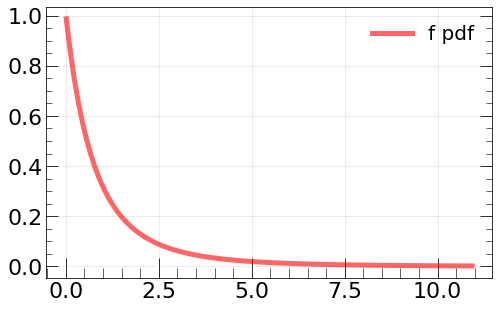

In [208]:
# Графики F-distribution

dfn, dfd = ndf_ssb, ndf_ssw

fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.f.ppf(0.01, dfn, dfd),
                stats.f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, stats.f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')
ax.legend(loc='best', frameon=False)
plt.show()

In [214]:
# Допустим, что при сравнении четырех групп между собой (по 5 наблюдений в каждой группе) 
# вы получили F = 3.5, тогда:

n = 4 # число групп
m = 5 # число наблдюдений
f = 3.5

ndf_ssw = n*(m-1)
ndf_ssb = n-1

p = stats.f(ndf_ssb, ndf_ssw).sf(f)
print('p =', p)

p = 0.040052541494826094


In [292]:
# Therapy - тип терапии, expr - уровень экспрессии гена
# H0: Средний уровень экспрессии генов будет одинаковым при использовании всех четырёх типов терапии
# H1: Опровергает гипотезу H0

data = pd.read_csv('genetherapy.csv')
therapy_types = data['Therapy'].unique()
mean_total = data['expr'].mean()
n = len(therapy_types)
m = data.loc[data['Therapy'] == 'A'].shape[0]

# SSW = sum[sum{(x_ij - mean_j)^2}]
ssw = sum([
    sum((data.loc[data['Therapy'] == therapy_i]['expr'] -
         data.loc[data['Therapy'] == therapy_i]['expr'].mean())**2)
    for therapy_i in therapy_types
])
# NDF = N - n
ndf_ssw = n * m - n
print(f'SSW = {round(ssw, 2)}')
print(f'ndf = {ndf_ssw}')

# SSB = sum{m * (mean_j - mean_total)^2}
ssb = sum([
    m * (data.loc[data['Therapy'] == therapy_i]['expr'].mean() - mean_total)**2
    for therapy_i in therapy_types
])
# NDF = n - 1
ndf_ssb = n - 1
print(f'SSB = {round(ssb, 2)}')
print(f'ndf = {ndf_ssb}')

# Сейчас считаем F (отношение нормаированных межгрупповой и внутригрупповой изменчивостей)
f = (ssb / ndf_ssb) / (ssw / ndf_ssw)
print(f'F = {round(f,3)}')

# И наконец рассчёт p-value
p = stats.f(ndf_ssb, ndf_ssw).sf(f)
print(f'p = {round(p,6)}')


### То же самое можно сдлать гораздо проще
A = data[data["Therapy"] == "A"]["expr"]
B = data[data["Therapy"] == "B"]["expr"]
C = data[data["Therapy"] == "C"]["expr"]
D = data[data["Therapy"] == "D"]["expr"]
print(stats.f_oneway(A, B, C, D))

# Или так
# тут прикол в том, что data.groupby('Therapy')['expr'] возвращает тупль, в котором 0-ой элемент
# это значение колонки Therapy ('A', 'B', 'C', 'D'), а 1-ый Series из значений expr 
samples=[list(frame) for group,frame in data.groupby('Therapy')['expr']]
print(stats.f_oneway(*samples))

SSW = 1302.27
ndf = 56
SSB = 560.72
ndf = 3
F = 8.037
p = 0.000152
F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)
F_onewayResult(statistic=8.03730248114399, pvalue=0.00015249722895229536)


## Множественные сравнения ANOVA

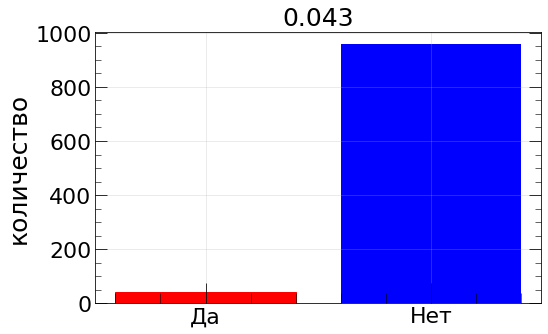

In [311]:
# Можно ввести поправку Бонферрони. Её смысл заключается в том, что мы делим пороговое значение a
# на число сочетаний из m по 2, где m - это число выборок в сэмпле, из которого мы их попарно сравниваем
# C(m, 2) = (m! / (m - 2)! * 2!)
# Например, если выборок у нас 8, то поправка будет C(8, 2) = 28, получатся
# a' = a / C(m,2)
# a' = 0.05 / C(m,2)


M = 0
D = 1

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    a_corr = math.factorial(m) / (2 * math.factorial(m-2))
    a = a / a_corr # вводим поправку Бонферони
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}

        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = plt.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    plt.title(round(hist['Да'] / trys,3))
    plt.ylabel('количество')
    plt.show()
    

false_alarm(4, 30, 0.05)

## Многофакторный ANOVA

In [367]:
data = pd.read_csv('atherosclerosis.csv')
data.groupby(['age', 'dose']).mean()['expr']
data.groupby(['age', 'dose']).mean()['expr']
data.groupby(['age', 'dose']).count()['expr']
data_dict = {'age': [index[0] for index in data.groupby(['age', 'dose']).mean().index],
            'dose': [index[1] for index in data.groupby(['age', 'dose']).mean().index],
            'N': data.groupby(['age', 'dose']).count()['expr'].values,
            'Mx': data.groupby(['age', 'dose']).mean()['expr'].values,
            'SD': data.groupby(['age', 'dose']).std()['expr'].values}
df_stat = pd.DataFrame(data_dict)
df_stat

,age,dose,N,Mx,SD
0,1,D1,16,104.758464,5.863454
1,1,D2,16,105.545864,4.369024
2,2,D1,16,101.004805,5.116310
3,2,D2,16,102.273629,5.135374
